In [1]:
import re
import os
import numpy as np
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from numpy import dot
from numpy.linalg import norm

In [2]:
keywords = ["personal","projects","experience","skills","education"]


stop_words = stopwords.words('english')

In [3]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    # resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = [x for x in resumeText.split() if x not in stop_words]     #Removing stopwords
    return resumeText

In [4]:

MAX_SEQUENCE_LENGTH = 100
MAX_WORDS = None



In [5]:
def read_txt (path_to_folder, dir):
    indexes = []
    categories = {}
    for w in keywords:
        categories[w] = []
    for filename in dir:
        file = open(path_to_folder + filename,'r')
        read = file.read()
        read = read.lower()
        file.close()

        read = cleanResume(read)

        hash = {}
        hash["personal"] =0
        for word in keywords:
            if word in read:
                hash[word] = read.index(word)


        items = sorted(hash.items(), key = lambda x: x[1])
        for i in range(len(items)):
            start = items[i][1]
            end = None
            if (i+1)==len(items):
                end = len(read)
            else:
                end = items[i+1][1]

            categories[items[i][0]].append(read[start:end])

        for w in keywords:
            if w not in hash.keys():
                categories[w].append('None') 

        indexes.append(filename)
    return  categories, indexes

In [6]:
dir = os.listdir('./train_txt/')
categories, indexes = read_txt('./train_txt/',dir)

In [17]:
data = []
sentences = []
for i in range(len(indexes)):
    row = []
    for w in keywords:
        row.append(categories[w][i])
        if categories[w][i] is not  None:
            sentences.append(categories[w][i])

    data.append(row)

In [18]:
sentences += [['<unk>']]

In [19]:
df = pd.DataFrame(data, index=indexes, columns=keywords)
df

,personal,projects,experience,skills,education
candidate_000.txt,"[personal, profile, actively, seeking, opportu...","[projects, music, genre, classification, face,...",None,"[skills, python, sql, mysql, tableau, power, b...","[education, b, tech, ece, vit, ap, university,..."
candidate_001.txt,"[brianna, williams, junior, developer, executi...","[projects, also, contribute, knowledge, logica...","[experience, curiosity, driven, data, scientis...","[skills, towards, consistent, growth, developm...","[education, teamwork, bsc, ca, mamco, universi..."
candidate_002.txt,"[mason, quadrado, associate, analyst, certifie...",None,"[experience, analyzing, interpreting, data, go...","[skills, python, machine, learning, mysql, dat...","[education, b, tech, b, e, electronics, teleco..."
candidate_003.txt,"[associate, software, engineer]","[projects, koy, ok, 1e, im, ge, tena, wal, tur...","[experience, software, engineer, machine, lear...","[skills, ava, alo, avin, zt, od, al, ms, 1, da...","[education, b, tech, v, v, 2018, activities, a..."
candidate_006.txt,"[jennifer, armstrong, computer, vision, enthus...","[projects, understanding, images, gan, based, ...","[experience, currently, professional, experience]","[skills, machine, learning, deep, learning, co...","[education, b, tech, computer, science, iit, g..."
...,...,...,...,...,...
candidate_144.txt,"[benjamin, osta, fresher, developer, professio...","[projects, proficient]",None,"[skills, software, engineer, software, develop...",None
candidate_145.txt,"[jerome, pelinsky, big, data, analyst, big, da...",None,"[experience, handling, kinds, data, also, used...","[skills, big, data, hadoop, hive, python, mapr...","[education, b, tech, electronics, amity, schoo..."
candidate_147.txt,"[jaroslav, chechnik, executive, profile, work]","[projects, music, genre, classification, face,...","[experience, looking, job, opportunity, expert...","[skills, b, tech, ece, vit, ap, university, 20...",[education]
candidate_148.txt,"[data, scientist]","[projects, acvaline, daal, lan, el, kx, 1e, mm...","[experience, building, deploying, end, end, an...","[skills, dy, esxoll, alot, dy, ha, wy, val, hv...","[education, b, tech, b, e, computers, rajiv, g..."


In [20]:
dir = ['Job description.txt']
cat, _ = read_txt('./', dir)

In [21]:
print(sentences[-5:])


[['projects', 'wesbite', 'using', 'react', 'made', 'fully', 'customizable', 'website', 'company', 'analyst', 'intern', 'work', 'background', 'larsen', 'toubro', 'analyst', 'intern', 'dec', '2019', 'till', 'date', 'building', 'ocr', 'models', 'based', 'test', 'report', 'data'], 'None', ['skills', 'artificial', 'intelligence', 'deep', 'learning', 'reinforcement', 'learning', 'tensorflow', 'keras', 'scikit', 'learn', 'numpy', 'pandas', 'matplotlib'], ['education', 'b', 'tech', 'hit', 'kancheepuram', 'chennai', '2019', 'activities', 'ksst', 'scholar'], ['<unk>']]


In [22]:
from gensim.models import Word2Vec
word2vec = Word2Vec(sentences, vector_size = 50, window = 3, min_count=1)


In [23]:
dictionary = list(word2vec.wv.key_to_index)
print(dictionary)

['data', 'learning', 'machine', 'analysis', '2019', 'python', 'skills', 'e', 'b', 'experience', '2020', 'projects', 'business', 'n', 'o', 'analytics', 'tech', 'N', 'profile', 'using', 'science', 'analyst', 'engineer', 'work', 'education', 'deep', 'software', 'university', 'processing', 'based', 'developer', 'activities', 'intern', 'language', 'natural', 'college', 'fresher', 'models', 'development', 'date', 'till', 'management', 'intelligence', 'worked', 'engineering', 'nlp', 'junior', 'text', 'computer', 'solutions', 'system', '2018', 'history', 'sql', 'regression', 'scientist', 'statistical', 'visualization', 'cloud', 'mining', 'artificial', 'learn', 'project', 'professional', 'tableau', 'r', 'time', 'different', 'modeling', 'looking', 'problems', 'aws', 'building', 'big', 'vision', 'may', 'research', 'working', 'technology', 'end', 'like', 'ongoing', 'well', 'predictive', '2021', 'associate', 'understanding', 'also', 'jan', 'proficient', 'model', 'neural', 'currently', 'customer', '

embeddings_dict = {}
embed_keys = []
with open("glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        embed_keys.append(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [25]:
jd_vec = {}
unks = 0
for w in keywords:
    vecs = []
    for word in cat[w][0]:
        if word in dictionary:
            vecs.append(word2vec.wv.get_vector(word))
        else:
            unks+=1
            vecs.append(word2vec.wv.get_vector('<unk>'))
    vecs = np.array(vecs)
    avg = np.average(vecs, axis = 0)
    jd_vec[w] = avg

print("Total unk tokens" , unks)

Total unk tokens 13


In [33]:
sim_df = []
unks=[]
all_words = []
for i in range(len(indexes)):
    row = []
    for w in keywords:
        vecs = []
        for word in categories[w][i]:
            all_words.append(word)
            if word in dictionary:
                vecs.append(word2vec.wv.get_vector(word))
            else:
                unks.append(word)
                vecs.append(word2vec.wv.get_vector('<unk>'))
        vecs = np.array(vecs)
        va = np.average(vecs, axis = 0)
        cosine = None
        if np.isnan(va).any():
            cosine = 0
        else:
            vb = jd_vec[w]
            cosine = dot(va,vb)/(norm(va)*norm(vb))
        
        row.append(cosine)
    
    sim_df.append(row)

all_words = set(all_words)
unks = set(unks)
print("Total words extracted are ", len(all_words))
print("Total unk tokens" , len(unks))

Total words extracted are  2319
Total unk tokens 0


C:\Users\sriva\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\sriva\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
# Similartiy Table
similariy = pd.DataFrame(sim_df, index=indexes, columns=keywords)
similariy

,personal,projects,experience,skills,education
candidate_000.txt,0.966625,0.365607,0.520925,0.955281,0.898107
candidate_001.txt,0.911629,0.389317,0.568694,0.920958,0.883792
candidate_002.txt,0.941745,1.000000,0.621853,0.977745,0.902465
candidate_003.txt,0.905338,0.234835,0.574854,0.959423,0.908663
candidate_006.txt,0.956729,0.405046,0.643552,0.953231,0.849037
...,...,...,...,...,...
candidate_144.txt,0.971509,0.518020,0.520925,0.972738,0.398747
candidate_145.txt,0.951034,1.000000,0.620727,0.976338,0.894870
candidate_147.txt,0.912963,0.242532,0.591480,0.956939,0.669377
candidate_148.txt,0.933791,0.350090,0.597902,0.964187,0.875844


In [35]:
similariy.fillna(0, inplace=True)

In [36]:
xs = np.array(similariy)

In [37]:
target = pd.read_csv('./dataset/train.csv', index_col='CandidateID')
target.head()

,Match Percentage
CandidateID,
candidate_011,13.60
candidate_113,36.63
candidate_123,54.93
candidate_012,41.46
candidate_002,48.91


In [38]:
ys = []
for i in indexes:
    ys.append(target.loc[i[:-4]]['Match Percentage']/100)
ys = np.array(ys, dtype = np.float32)

In [39]:
xs = xs.astype(np.float32)
ys = ys.astype(np.float32)
print(xs.shape)
print(ys.shape)

(90, 5)
(90,)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = 0.1, random_state = 42)

In [41]:
from keras.models import Sequential, Model
from keras.layers import Dense , Dropout, Activation


In [52]:
def build_model():
    model = Sequential()
    model.add(Dense(8, input_shape =[5,]))
    model.add(Dense(8))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics =['mse'])
    return model

In [53]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train,y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
3/3 [==============================] - 4s 339ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.6778 - val_mse: 0.6778
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.4130 - mse: 0.4130 - val_loss: 0.5018 - val_mse: 0.5018
Epoch 3/100
3/3 [==============================] - 0s 57ms/step - loss: 0.2823 - mse: 0.2823 - val_loss: 0.3662 - val_mse: 0.3662
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 0.1882 - mse: 0.1882 - val_loss: 0.2687 - val_mse: 0.2687
Epoch 5/100
3/3 [==============================] - 0s 48ms/step - loss: 0.1307 - mse: 0.1307 - val_loss: 0.2044 - val_mse: 0.2044
Epoch 6/100
3/3 [==============================] - 0s 46ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.1666 - val_mse: 0.1666
Epoch 7/100
3/3 [==============================] - 0s 50ms/step - loss: 0.0890 - mse: 0.0890 - val_loss: 0.1462 - val_mse: 0.1462
Epoch 8/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0888 - mse: 0.0

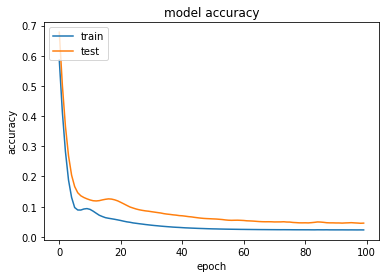

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
#Testing
dir = os.listdir('./test_txt/')
test_cat, test_index = read_txt('./test_txt/',dir)

In [57]:
test_df = []
for i in range(len(test_index)):
    row = []
    for w in keywords:
        vecs = []
        for word in test_cat[w][i]:
            if word in dictionary:
                vecs.append(word2vec.wv.get_vector(word))
            else:
                vecs.append(word2vec.wv.get_vector('<unk>'))
        vecs = np.array(vecs)
        va = np.average(vecs, axis = 0)
        cosine = None
        if np.isnan(va).any():
            cosine = 0
        else:
            vb = jd_vec[w]
            cosine = dot(va,vb)/(norm(va)*norm(vb))
        
        row.append(cosine)
    
    test_df.append(row)

C:\Users\sriva\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\sriva\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [58]:
test_sim = pd.DataFrame(test_df, index=test_index, columns=keywords)
test_sim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, candidate_004.txt to candidate_146.txt
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personal    60 non-null     float64
 1   projects    60 non-null     float32
 2   experience  60 non-null     float32
 3   skills      60 non-null     float32
 4   education   60 non-null     float32
dtypes: float32(4), float64(1)
memory usage: 1.9+ KB


In [59]:
txs = np.array(test_sim)
print(txs.shape)

(60, 5)


In [60]:
ans = model.predict(txs)
ans = np.reshape(ans, (ans.shape[0],1))
ans = ans*100 

In [48]:
def write(ans,test_index):
    ans = np.reshape(ans, (ans.shape[0],1))
    ans_index = np.array([x[:-4] for x in test_index])
    ans_index = np.reshape(np.ravel(ans_index) , ans.shape)
    ans = np.concatenate([ans_index,ans] , axis = 1)
    ans_df = pd.DataFrame(ans, index=None, columns=['CandidateID','Match Percentage'])
    print("Written new file")
    ans_df.to_csv('submission.csv',index=None)


In [61]:
write(ans, test_index)

Written new file


In [63]:
## Trying other models
from sklearn.svm import SVR
svr = SVR(C=5.0,epsilon=0.9)
svr.fit(xs,ys)
ans_ =svr.predict(txs)
ans_ = np.reshape(ans_, (ans_.shape[0],1))
ans_ = ans_*100

write(ans_, test_index)

Written new file


In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(xs,ys)
ansr = ridge.predict(txs)
ansr = ansr*100
write(ansr, test_index)

Written new file


In [122]:
take = np.copy(ans_)
for c in [1,5,10,80,110,120]:
    for e in [0.1, 0.002, 0.3, 0.83, 0.99]:
        svr = SVR(C = c, epsilon=e)
        svr.fit(xs,ys)
        ansx = svr.predict(txs)
        ansx = np.array([max(i,0) for i in ansx])
        ansx = np.reshape(ansx, (ansx.shape[0],1))
        ansx = ansx*100
        take = np.concatenate([take,ansx],axis = 1)
        

print(take.shape)

(60, 31)


In [123]:
# xx = np.concatenate([ans,ans_], axis = 1)
# xx = np.max(xx, axis = 1)
# xx
take = np.min(take, axis =1)
write(take, test_index)

Written new file


In [77]:
# write(xx, test_index)

In [83]:
sim_df

[[0.8883778, 0.29592833, 0.415252, 0.6364191, 0.8569552],
 [0.61097926, 0.23415965, 0.77697176, 0.7627605, 0.88227266],
 [0.66810286, 1.0, 0.62066585, 0.92462736, 0.75430495],
 [0.6947064, 0.37840423, 0.6942319, 0.8254774, 0.7708976],
 [0.9067139, 0.3005535, 0.76933324, 0.8814044, 0.77308196],
 [0.8622184, 0.26828837, 0.5923649, 0.8857072, 0.8472573],
 [0.7662991, 0.29844406, 0.71198624, 0.89622736, 0.8148804],
 [0.87884367, 1.0, 0.7653649, 0.9167172, 0.70842457],
 [0.8062151, 0.37531516, 0.7211594, 0.62105846, 0.8475659],
 [0.89601, 1.0, 0.7691308, 0.49025878, 0.39326173],
 [0.8031282, 0.39070997, 0.415252, 0.9175321, 0.39326173],
 [0.65824354, 0.28509477, 0.71453303, 0.80462074, 0.76407284],
 [0.8402332, 0.20913859, 0.7447718, 0.841462, 0.75217324],
 [0.66937876, 0.32378915, 0.7058372, 0.8362547, 0.8839337],
 [0.9144753, 0.27800855, 0.78372127, 0.9103799, 0.7644413],
 [0.8660931, 0.38663623, 0.6984991, 0.9099471, 0.70065427],
 [0.86044085, 1.0, 0.73467994, 0.49025878, 0.39326173],
 [